In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import ast
import pickle
from tangles.separations import SetSeparationSystem
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tangles.movietangles.convenience import *
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans


In [3]:
seps, sepidtokeyword = csv_to_setseperationsystem('../data/data_K10.csv')
with open('../orders/orders_O12_K10', 'rb') as f:
    order_O12 = pickle.load(f)
lvltokeyword = [sepidtokeyword[x] for x in np.argsort(order_O12)[:650]]
with open('../results/interesting_umbrella_tm_K10', 'rb') as f:
    interesting_umbrella_tm = pickle.load(f)
oriented_seps = seps[:,np.argsort(order_O12)[:650]]

In [46]:
print((oriented_seps[:,230] == 1).sum())
print((oriented_seps[oriented_seps[:,230] == 1,35] == 1).sum())
print((oriented_seps[:,35] == 1).sum())

70
52
212


In [33]:
keyword_sims = np.zeros((650,650))
for i in range(650):
    for j in range(i):
        shared = (oriented_seps[oriented_seps[:,i] == 1,j] == 1).sum()
        keyword_sims[i,j] = shared / (oriented_seps[:,i] == 1).sum()
        keyword_sims[j,i] = shared / (oriented_seps[:,j] == 1).sum()

In [79]:
keyword_sims[1,1]

0.0

In [71]:
np.array([[1,2],[3,4]]).sum(axis = 0)

array([4, 6])

In [77]:
np.array([[1,2],[3,4]])[1,0]

3

In [67]:
keyword_sims

array([[0.        , 0.13998324, 0.08549874, ..., 0.00502934, 0.        ,
        0.00083822],
       [0.27377049, 0.        , 0.41967213, ..., 0.        , 0.00163934,
        0.00655738],
       [0.1588785 , 0.39875389, 0.        , ..., 0.        , 0.        ,
        0.00934579],
       ...,
       [0.13333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02777778, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.4       , 0.6       , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
np.argsort(keyword_sims.sum(axis = 0))

array([648, 564, 351, 636, 385, 586, 496, 569, 641, 558, 259, 447, 611,
       605, 594, 632, 634, 440, 609, 486, 647, 596, 345, 485, 637, 308,
       578, 610, 589, 615, 644, 620, 603, 421, 570, 643, 394, 538, 606,
       622, 515, 484, 546, 490, 268, 612, 624, 565, 472, 633, 640, 432,
       623, 621, 627, 575, 630, 404, 585, 608, 614, 481, 598, 642, 480,
       514, 383, 535, 442, 582, 539, 465, 491, 549, 579, 562, 456, 473,
       537, 540, 532, 498, 557, 597, 340, 501, 512, 581, 527, 556, 629,
       438, 494, 436, 566, 551, 469, 534, 619, 625, 547, 543, 504, 577,
       563, 595, 441, 542, 548, 638, 573, 545, 599, 533, 602, 525, 347,
       426, 250, 474, 523, 461, 580, 588, 617, 604, 560, 541, 584, 635,
       476, 464, 520, 646, 601, 454, 530, 500, 552, 522, 495, 576, 626,
       430, 395, 288, 536, 544, 497, 631, 550, 458, 482, 639, 526, 583,
       450, 508, 507, 448, 645, 382, 360, 519, 593, 509, 488, 419, 518,
       600, 437, 449, 493, 568, 505, 572, 559, 613, 443, 555, 41

In [35]:
high_sim = np.where(keyword_sims > 0.5)

In [60]:
high_sim

(array([ 15, 128, 128, 148, 148, 148, 154, 171, 171, 197, 216, 216, 230,
        259, 268, 268, 293, 308, 336, 350, 389, 389, 396, 440, 461, 472,
        479, 479, 495, 496, 517, 517, 562, 564, 579, 579, 586, 611, 630,
        633, 635, 635, 635, 648, 649]),
 array([  5,  32, 148,  32,  41, 128,   2,  32,  41,  20,  21, 268,  35,
        308,  21, 216,   0, 259,  26,  20,   1,   2,   2,  84,  21,  18,
          2,   5,  60,  18,   2,   5,   0,  55, 298, 346,  65,  18,  34,
         36,   1,   2,   5,  30,   2]))

In [62]:
[i for i in high_sim[0] if i in high_sim[1]]

[128, 128, 148, 148, 148, 216, 216, 259, 268, 268, 308]

In [ ]:
128, 148
259, 308

In [99]:
lvltokeyword[148]

['dc comics']

In [51]:
[[keyword_sims[high_sim[0][i], high_sim[1][i]],lvltokeyword[high_sim[0][i]], lvltokeyword[high_sim[1][i]]] for i in range(len(high_sim[0]))]

[[0.5714285714285714, ['male nudity'], ['female nudity']],
 [0.6049382716049383, ['super powers'], ['superhero']],
 [0.7037037037037037, ['super powers'], ['dc comics']],
 [0.6527777777777778, ['dc comics'], ['superhero']],
 [0.5138888888888888, ['dc comics'], ['based on comic']],
 [0.7916666666666666, ['dc comics'], ['super powers']],
 [0.5205479452054794, ['erotic movie'], ['sex']],
 [0.7419354838709677, ['marvel comic'], ['superhero']],
 [0.7096774193548387, ['marvel comic'], ['based on comic']],
 [0.578125, ['gay relationship'], ['gay']],
 [0.75, ['giant monster'], ['monster']],
 [0.5833333333333334, ['giant monster'], ['kaiju']],
 [0.7428571428571429, ['kung fu'], ['martial arts']],
 [0.5517241379310345, ['stand-up comedy'], ['comedian']],
 [0.6666666666666666, ['kaiju'], ['monster']],
 [0.717948717948718, ['kaiju'], ['giant monster']],
 [0.5609756097560976, ['maniac'], ['murder']],
 [0.5714285714285714, ['comedian'], ['stand-up comedy']],
 [0.5434782608695652, ['cyberpunk'], ['dy

In [45]:
high_sim

(array([ 15, 128, 128, 148, 148, 148, 154, 171, 171, 197, 216, 216, 230,
        259, 268, 268, 293, 308, 336, 350, 389, 389, 396, 440, 461, 472,
        479, 479, 495, 496, 517, 517, 562, 564, 579, 579, 586, 611, 630,
        633, 635, 635, 635, 648, 649]),
 array([  5,  32, 148,  32,  41, 128,   2,  32,  41,  20,  21, 268,  35,
        308,  21, 216,   0, 259,  26,  20,   1,   2,   2,  84,  21,  18,
          2,   5,  60,  18,   2,   5,   0,  55, 298, 346,  65,  18,  34,
         36,   1,   2,   5,  30,   2]))

In [27]:
lvltokeyword[128]

['super powers']

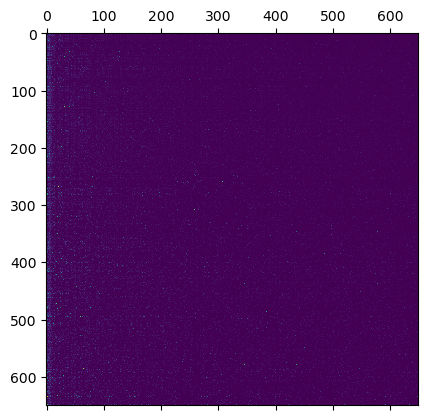

In [20]:
plt.matshow(keyword_sims)

TypeError: 'range' object is not callable

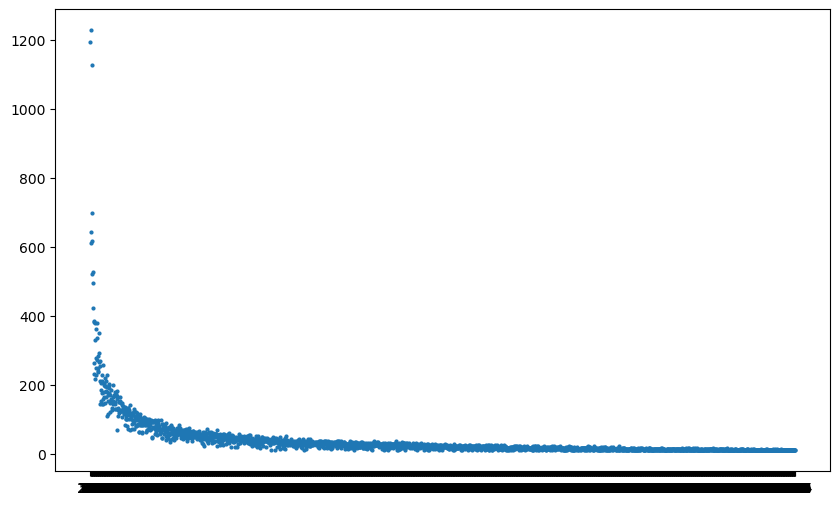

In [46]:
labels = [sepidtokeyword[id][0] for id in np.argsort(order_O12)]
sizes_O12 = [np.count_nonzero(seps[:,x] == 1) for x in np.argsort(order_O12)]
plt.figure(figsize = (10,6))
O12_str = np.argsort(order_O12).astype(str)
plt.scatter(O12_str, np.array(sizes_O12), s = 4)
plt.xticks(O12_str[::50], labels[::50], rotation=90)
plt.xlabel('keyword $k$')
plt.ylabel(r'$| \vec{k} |$')
plt.yscale('log')
plt.axvline(650, color = 'r', linestyle ='--', label = "keywords on the left where oriented")
plt.legend()
#plt.savefig('O12_sizes.png')

Checks if any level is associated with more than one keyword:

In [4]:
np.any([len(x) > 1 for x in lvltokeyword])

False

Calculates the first two principal componets of the matrix containing the interesting umbrella tangles:

In [4]:
pca = PCA(n_components= 2)
principal_components = pca.fit_transform(interesting_umbrella_tm)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Finds the optimal number of clusters:

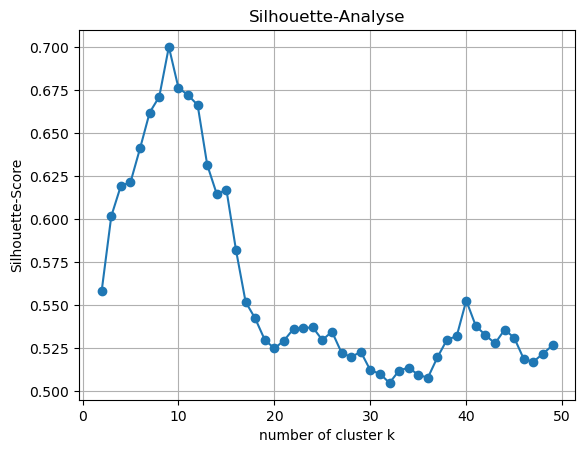

For 9 clusters we get the best average silhouette score of 0.7001461262418175


In [6]:
silhouette_scores = []
k_values = range(2, 50)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    score = silhouette_score(pca_df[['PC1', 'PC2']], kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('number of cluster k')
plt.ylabel('Silhouette-Score')
plt.title('Silhouette-Analyse')
plt.grid()
plt.show()

print("For", k_values[np.argmax(silhouette_scores)], "clusters we get the best average silhouette score of", np.max(silhouette_scores))

Clusters the Tangles and plots them:

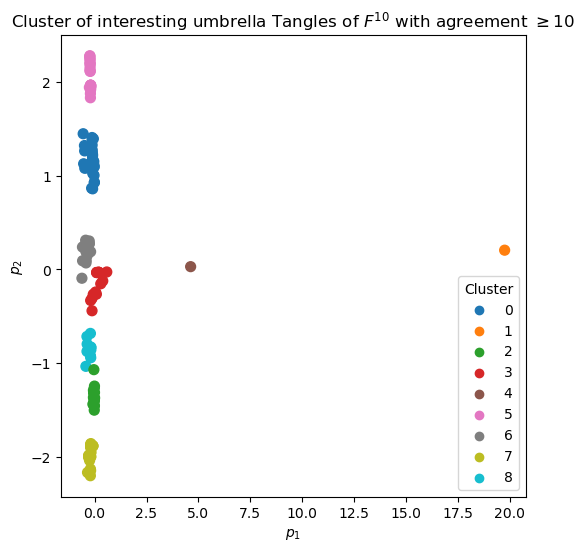

In [5]:
kmeans = KMeans(n_clusters=9, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

plt.figure(figsize=(6,6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap = cm.tab10, s=50)
plt.title(r'Cluster of interesting umbrella Tangles of $F^{10}$ with agreement $\geq 10$')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')

for i in range(9):
    plt.scatter([], [], c=[cm.tab10(plt.Normalize(0, 8)(i))], label=str(i))
plt.legend(title='Cluster', loc='best')
plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/cluster_ag10.png', bbox_inches='tight')
plt.show()

Calculates the sizes of the corpora and cores of the tangles:

In [6]:
corpora = np.zeros((seps.shape[0], interesting_umbrella_tm.shape[0]))
for i in range(seps.shape[0]):
    match = (interesting_umbrella_tm[:,(oriented_seps[i] == 1)] == 1).sum(axis = 1)
    corpora[i, np.where(match >= 3)] = 1
corpora_sizes = (corpora == 1).sum(axis = 0)

In [7]:
cores = {}
for i in range(interesting_umbrella_tm.shape[0]):
    pos = np.where(interesting_umbrella_tm[i] == 1)[0]
    core = np.where(oriented_seps[:,pos].min(axis = 1) == 1)[0]
    cores[i] = core.size   
small_cores = [x for x in cores.keys() if cores[x] < 10]
len(small_cores)

46

In [8]:
#greedy genre ranking
genres = []
genre_sizes = []
cc = corpora.copy()
while 1 in cc:
    next_genre = np.argmax(cc.sum(axis=0))
    genres.append(next_genre)
    genre_sizes.append(cc[:,next_genre].sum())
    cc[cc[:,next_genre] == 1] = 0
i = 0
for t in genres:
    printkeywordsfromtm(interesting_umbrella_tm, t, lvltokeyword)
    print(i, "-th genre contains", corpora_sizes[t], "movies")
    print("It has core of size ",cores[t])
    i +=1
    

Tangle:  4
['murder']
['nudity']
['sex']
['violence']
['female nudity']
['independent film']
0 -th genre contains 325 movies
It has core of size  3
Tangle:  27
['murder']
['nudity']
['violence']
['female nudity']
['independent film']
['blood']
['gore']
1 -th genre contains 293 movies
It has core of size  2
Tangle:  129
['superhero']
['based on comic']
['super powers']
['dc comics']
2 -th genre contains 55 movies
It has core of size  20
Tangle:  23
['nudity']
['sex']
['love']
['teenager']
3 -th genre contains 81 movies
It has core of size  7
Tangle:  0
['gay']
['lgbt']
['homosexuality']
['gay relationship']
['gay man']
4 -th genre contains 36 movies
It has core of size  12
Tangle:  63
['murder']
['violence']
['police']
['detective']
5 -th genre contains 57 movies
It has core of size  7
Tangle:  131
['superhero']
['based on comic']
['marvel comic']
6 -th genre contains 35 movies
It has core of size  35
Tangle:  11
['murder']
['nudity']
['violence']
['female nudity']
['independent film']


How many movies are in the first 9 greedely chosen tangles?

In [13]:
(corpora[:,genres[:9]].max(axis = 1) == 1).sum()

661

Chooses the tangle with largest corpus for each cluster as it's representative:

In [9]:
representatives = []
for i in np.unique(pca_df['Cluster'].values):
    print('CLUSTER', i)
    print('has ', (pca_df['Cluster'] == i).sum(), ' tangles')
    mask =  np.where(pca_df['Cluster'] != i)[0]
    masked_corpora = corpora_sizes.copy()
    masked_corpora[mask] = 0
    representative = np.argmax(masked_corpora)
    representatives.append(representative)
    printkeywordsfromtm(interesting_umbrella_tm, representative, lvltokeyword)
    print("corpus has size ", masked_corpora[representative])
    print("It has core of size ",cores[representative])

CLUSTER 0
has  30  tangles
Tangle:  27
['murder']
['nudity']
['violence']
['female nudity']
['independent film']
['blood']
['gore']
corpus has size  293
It has core of size  2
CLUSTER 1
has  1  tangles
Tangle:  0
['gay']
['lgbt']
['homosexuality']
['gay relationship']
['gay man']
corpus has size  36
It has core of size  12
CLUSTER 2
has  16  tangles
Tangle:  43
['sex']
['independent film']
['teenager']
['drug']
corpus has size  44
It has core of size  7
CLUSTER 3
has  16  tangles
Tangle:  129
['superhero']
['based on comic']
['super powers']
['dc comics']
corpus has size  55
It has core of size  20
CLUSTER 4
has  1  tangles
Tangle:  1
['treasure']
['treasure hunt']
['archaeologist']
corpus has size  13
It has core of size  13
CLUSTER 5
has  25  tangles
Tangle:  25
['murder']
['violence']
['revenge']
['blood']
corpus has size  78
It has core of size  6
CLUSTER 6
has  17  tangles
Tangle:  4
['murder']
['nudity']
['sex']
['violence']
['female nudity']
['independent film']
corpus has size 

How many movies are in the corpora of the cluster-representatives?

In [11]:
(corpora[:,representatives].max(axis = 1) == 1).sum()

566

Checks if all tangels of any cluster agree on a keyword:

In [ ]:
for i in range(9):
    print("All tangles of cluster",i, "agree on:")
    cluster_size = (pca_df['Cluster'] == i).sum()
    for k in np.where((interesting_umbrella_tm[np.where(pca_df['Cluster'] == i)[0]]).sum(axis = 0) == cluster_size)[0]:
        print(lvltokeyword[k])

Prints all tangles, sorted by cluster:

In [8]:
for i in np.unique(pca_df['Cluster'].values):
    print('CLUSTER', i)
    for t in np.where(pca_df['Cluster'] == i)[0]:
        printkeywordsfromtm(interesting_umbrella_tm, t, lvltokeyword)

CLUSTER 0
Tangle:  8
['murder']
['independent film']
['based on novel']
Tangle:  11
['murder']
['nudity']
['violence']
['female nudity']
['independent film']
['revenge']
Tangle:  13
['murder']
['nudity']
['violence']
['female nudity']
['police']
Tangle:  14
['murder']
['revenge']
['police']
Tangle:  20
['murder']
['nudity']
['violence']
['teenager']
Tangle:  26
['murder']
['police']
['blood']
Tangle:  27
['murder']
['nudity']
['violence']
['female nudity']
['independent film']
['blood']
['gore']
Tangle:  32
['murder']
['nudity']
['violence']
['female nudity']
['male nudity']
Tangle:  40
['murder']
['police']
['drug']
Tangle:  45
['murder']
['teenager']
['high school']
Tangle:  54
['murder']
['independent film']
['revenge']
['rape']
Tangle:  57
['murder']
['police']
['serial killer']
Tangle:  64
['murder']
['suspense']
['detective']
Tangle:  73
['murder']
['blood']
['slasher']
Tangle:  75
['murder']
['nudity']
['violence']
['female nudity']
['serial killer']
['slasher']
Tangle:  78
['mu

Plots the matrix containing the interesting umbrella tangles:

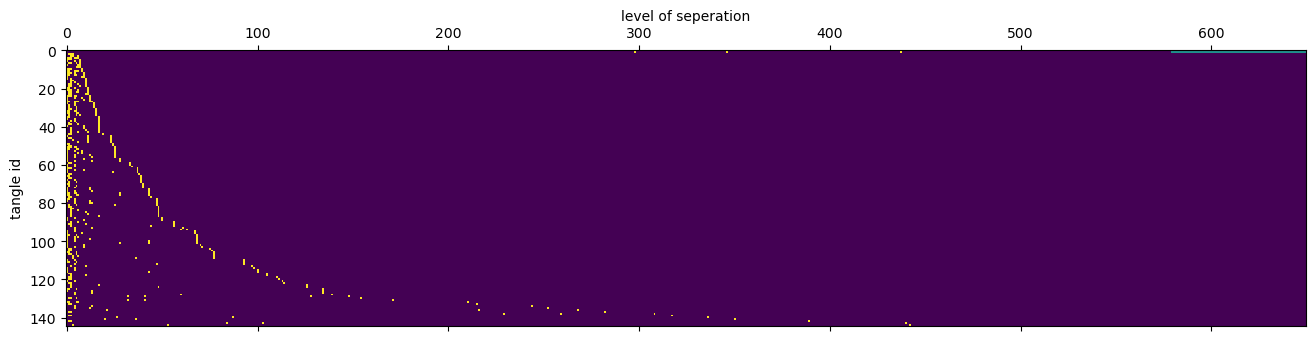

In [20]:
plt.matshow(interesting_umbrella_tm[:650])
plt.gca().set_aspect('auto')
plt.gca().xaxis.set_label_position('top')
plt.xlabel('level of seperation')
plt.ylabel('tangle id')
plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/tm_entropy_K10.png', bbox_inches='tight')

Plots for each level the percentage of tangles containing the assoziated keyword:

In [ ]:
plt.scatter(range(interesting_umbrella_tm.shape[1]),((interesting_umbrella_tm == 1).sum(axis = 0) / interesting_umbrella_tm.shape[0]))
plt.xlabel('separation level')
plt.ylabel('proportion of tangles containing separation')
#plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/proportions_separations.png', bbox_inches='tight')

Counts the number of interessting umbrella tangles containing at least 1 and 2 keywords assosiated with one of the first 10 levels:

In [ ]:
print(((interesting_umbrella_tm[:,:10] == 1).sum(axis = 1) >= 1).sum())
print(((interesting_umbrella_tm[:,:10] == 1).sum(axis = 1) >= 2).sum())

Counts keywords, that are not contained in any tangle:

In [ ]:
not_contained_keywords = [lvltokeyword[x] for x in np.where((interesting_umbrella_tm == 1).sum(axis = 0) == 0)[0]]
len(not_contained_keywords)

Calculates the core of each tangle and counts the tangles with less than 10 movies in its core:

In [15]:
for i in np.argsort((interesting_umbrella_tm[small_cores] == 1).sum(axis = 1)):
    printkeywordsfromtm(interesting_umbrella_tm, small_cores[i], lvltokeyword)

Tangle:  81
['nudity']
['female nudity']
['rape']
['torture']
Tangle:  63
['murder']
['violence']
['police']
['detective']
Tangle:  62
['murder']
['nudity']
['sex']
['detective']
Tangle:  58
['murder']
['violence']
['gore']
['serial killer']
Tangle:  56
['murder']
['violence']
['gore']
['rape']
Tangle:  55
['murder']
['violence']
['blood']
['rape']
Tangle:  54
['murder']
['independent film']
['revenge']
['rape']
Tangle:  53
['murder']
['violence']
['revenge']
['rape']
Tangle:  111
['murder']
['nudity']
['female nudity']
['sadism']
Tangle:  78
['murder']
['nudity']
['violence']
['torture']
Tangle:  46
['nudity']
['sex']
['teenager']
['high school']
Tangle:  43
['sex']
['independent film']
['teenager']
['drug']
Tangle:  34
['nudity']
['female nudity']
['based on novel']
['male nudity']
Tangle:  79
['murder']
['violence']
['blood']
['torture']
Tangle:  80
['violence']
['blood']
['gore']
['torture']
Tangle:  74
['murder']
['violence']
['gore']
['slasher']
Tangle:  25
['murder']
['violence'

Counts how many movies are in the corpus of at least one tangle:

In [13]:
((corpora == 1).any(axis = 1)).sum()

1131

Plots the sizes of the corpora:

In [ ]:
plt.scatter(np.argsort(corpora_sizes).astype(str), np.sort(corpora_sizes)[::-1], s = 5)
plt.xticks(np.argsort(corpora_sizes).astype(str)[::10], rotation = 45)
plt.xlabel(r'tangle $\tau$')
plt.ylabel(r'$|C(\tau)|$')
#plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/body_sizes_F3.png', bbox_inches='tight')

In [13]:
data = pd.read_csv('../data/data_K10.csv')
data['keywords'] = data['keywords'].apply(lambda x: ast.literal_eval(x))
data["genres"] = data["genres"].apply(lambda x: ast.literal_eval(x))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Returns the movies of the corpus of a tangle:

Prints the core of the representatives of the clusters:

In [ ]:
for i in range(9):
    print("The core of the representative of cluster", i, "contains:")
    print(data['original_title'][cores[representatives[i]]])

In [14]:
print(data['original_title'][corpora[:,129] == 1])

104                                         Batman Forever
394                                                 Batman
859                                         Batman Returns
951                                         Batman & Robin
1647                                              Superman
1648                                           Superman II
1649                                          Superman III
1650                      Superman IV: The Quest for Peace
1999                          Batman: Mask of the Phantasm
5192                    Batman Beyond: Return of the Joker
5628                                         Batman Begins
6116                                      Superman Returns
6874                      Justice League: The New Frontier
6887                                       The Dark Knight
7562                           Green Lantern: First Flight
8057                            Batman: Under the Red Hood
8153                           Superman/Batman: Apocalyp

In [15]:
print(data['original_title'][corpora[:,131] == 1])

2338                                         X-Men
3655                                            X2
5091                               Captain America
5670                                Fantastic Four
6548                  4: Rise of the Silver Surfer
6934                                      Iron Man
6987                           The Incredible Hulk
7943                                    Iron Man 2
8552                                          Thor
8638                            X-Men: First Class
8708            Captain America: The First Avenger
8837                                  The Avengers
9149                   The Incredible Hulk Returns
9301                            The Fantastic Four
9744                          アイアンマン：ライズ・オブ・テクノヴォア
9746                                   Planet Hulk
9760                                    Iron Man 3
9788                               Captain America
9884                                 The Wolverine
10118                         T

Prints the corpora of the representatives of the clusters:

In [15]:
for i in range(9):
    print("The corpus of the representative of cluster", i, "contains:")
    print(data['original_title'][corpora[:,representatives[i]] == 1])

The corpus of the representative of cluster 0 contains:


NameError: name 'representatives' is not defined

In [29]:
range(len(data.index))

range(0, 15567)

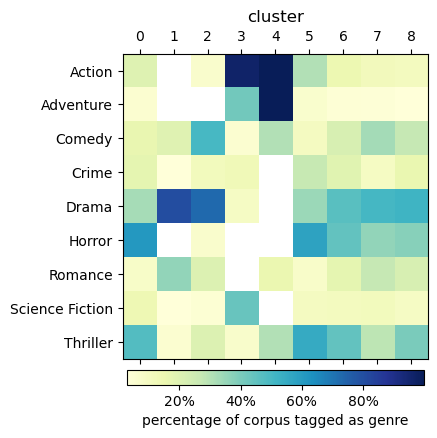

In [55]:
fig = plot_genre_mat(data, corpora, representatives)
#fig.axes.set_xlables(range(9))
plt.title("cluster")
cbar = plt.colorbar(fig, orientation = "horizontal", pad = 0.03, shrink = 0.8)
cbar.set_label("percentage of corpus tagged as genre")
cbar.set_ticks(ticks=[0.2,0.4,0.6,0.8],labels= ["20%", "40%", "60%", "80%"])
plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/genre_mat_cluster_10.png', bbox_inches='tight')

In [43]:
[str(i) for i in range(2)]

['0', '1']

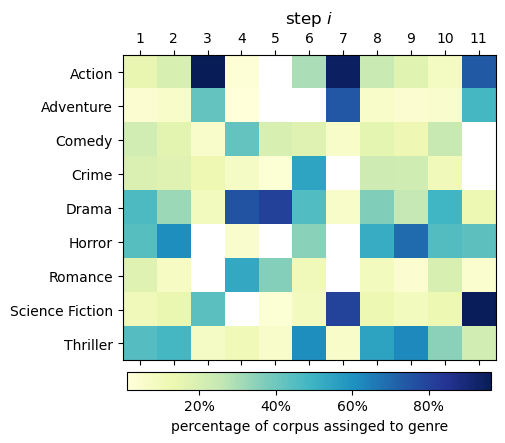

In [ ]:
fig = plot_genre_mat(data, corpora, genres[:11])
ax = plt.gca()
ax.set_xticks(ticks = range(11), labels=range(1,12))
plt.title("step $i$")
cbar = plt.colorbar(fig, orientation = "horizontal", pad = 0.03, shrink = 0.8)
cbar.set_label("percentage of corpus assinged to genre")
cbar.set_ticks(ticks=[0.2,0.4,0.6,0.8],labels= ["20%", "40%", "60%", "80%"])
plt.savefig('/home/ocke/Documents/BA-Tangles/vortrag/genre_mat_greedy_10_vortrag.png', bbox_inches='tight')
#plt.savefig('/home/ocke/Documents/BA-Tangles/tex/images/genre_mat_greedy_10.png', bbox_inches='tight')

In [14]:
(corpora[:,representatives].max(axis = 1) == 1).sum()

566

In [15]:
(corpora[:,genres[:len(representatives)]].max(axis = 1) == 1).sum()

661